In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objective:**
Build a KNN model to predict insurance plan

Data Dictionary:
Age - Numerical variable. It denotes the customer's age.
Policy Term- Numerical variable. It denotes the term of the insurance policy.
PPT - Numerical variable. It denotes the duration of the insurance premium payment.
Amount - Numerical variable. It denotes the insurance premium.
Plan - Categorical variable. It denotes the the type of insurance product.

# **Importing Libraries**

In [2]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# **Reading the dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Insurance Plan Prediction/Insurance.csv')
df.head()

,Age,Policy Term,PPT,Amount,Plan
0,33,20,10,30000,Nonpar
1,27,20,10,25000,Nonpar
2,36,20,10,30000,Nonpar
3,36,20,20,2000,Health
4,43,20,5,25000,Nonpar


# **Exploratory Data Analysis (EDA)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          100 non-null    int64 
 1   Policy Term  100 non-null    int64 
 2   PPT          100 non-null    int64 
 3   Amount       100 non-null    int64 
 4   Plan         100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,33.53,7.842458,21.0,26.00,33.0,40.0,59.0
Policy Term,100.0,17.91,2.538969,12.0,15.00,20.0,20.0,20.0
PPT,100.0,8.63,2.710455,5.0,6.75,10.0,10.0,20.0
Amount,100.0,107635.00,116724.095281,1500.0,30000.00,55000.0,100000.0,500000.0


In [7]:
df.shape

(100, 5)

In [8]:
df['Plan'].unique()

array(['Nonpar', 'Health', 'ULIP', 'Par'], dtype=object)

In [9]:
df.isnull().value_counts()

Age    Policy Term  PPT    Amount  Plan 
False  False        False  False   False    100
dtype: int64

In [10]:
df.Plan.value_counts()

Nonpar    67
ULIP      21
Par       10
Health     2
Name: Plan, dtype: int64

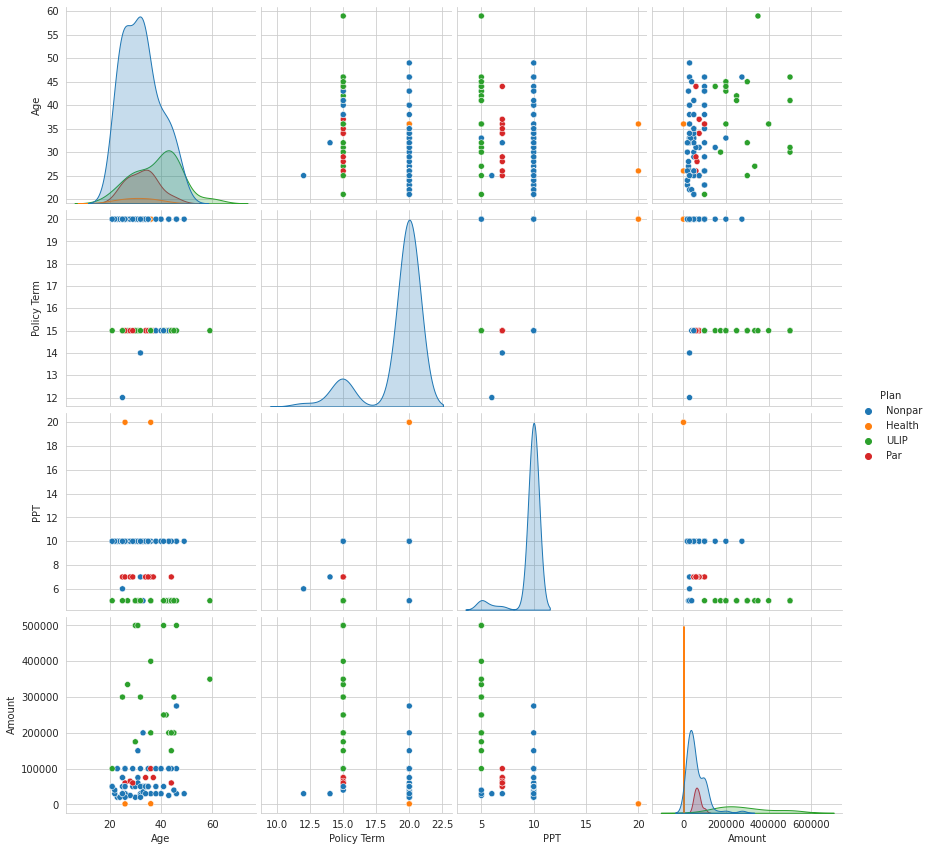

In [11]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Plan", height=3);
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


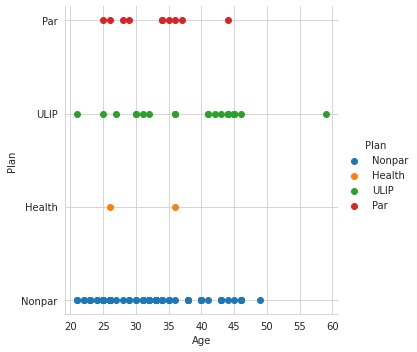

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Plan", size=5) \
.map(plt.scatter, "Age", "Plan") \
.add_legend();
plt.show()
# Scatterplot with respect to 'Age' and 'Plan'

In [19]:
data= df.rename(columns={'Policy Term': 'Term'})
data

,Age,Term,PPT,Amount,Plan
0,33,20,10,30000,Nonpar
1,27,20,10,25000,Nonpar
2,36,20,10,30000,Nonpar
3,36,20,20,2000,Health
4,43,20,5,25000,Nonpar
...,...,...,...,...,...
95,41,15,10,50000,Nonpar
96,45,15,5,300000,ULIP
97,26,20,10,20000,Nonpar
98,26,20,10,50000,Nonpar


# **Train and Test Split**

In [20]:
#For data 'X' take the first 4 columns 
X=data.iloc[:,0:4]
#For label 'y' take the 5th column
y=data.iloc[:,4]
#Split 60% of data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [15]:
#Calculating the square root value of train data to determine 'K value'
k_value = math.sqrt(len(y_train))
k_value = round(k_value)
k_value 

8

In [16]:
#Building and fitting KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=k_value, p=2, metric='euclidean')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [17]:
#Predicting the values using test data
y_pred = knn_model.predict(X_test)
y_pred

array(['Nonpar', 'Nonpar', 'ULIP', 'Nonpar', 'Nonpar', 'ULIP', 'Nonpar',
       'ULIP', 'Nonpar', 'Nonpar', 'Nonpar', 'ULIP', 'ULIP', 'ULIP',
       'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar',
       'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar', 'ULIP', 'Nonpar', 'Nonpar',
       'Nonpar', 'ULIP', 'Par', 'Nonpar', 'Nonpar', 'ULIP', 'Nonpar',
       'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar', 'Nonpar'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Health       0.00      0.00      0.00         1
      Nonpar       0.83      0.93      0.88        27
         Par       0.00      0.00      0.00         3
        ULIP       0.89      0.89      0.89         9

    accuracy                           0.82        40
   macro avg       0.43      0.45      0.44        40
weighted avg       0.76      0.82      0.79        40

Accuracy: 0.825
F1 Score: 0.825


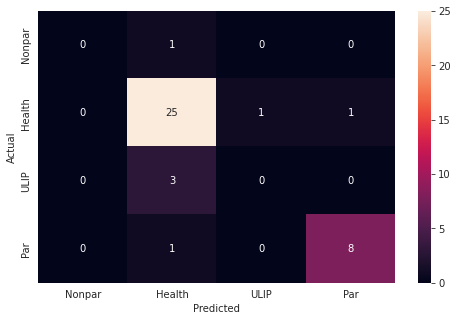

In [18]:
#Printing the classification report
cr = classification_report(y_test, y_pred)
print(cr)
accu_score = accuracy_score(y_test,y_pred)
print("Accuracy:",accu_score)
fscore=f1_score(y_test,y_pred,average='micro')
print("F1 Score:",fscore)

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Nonpar', 'Health', 'ULIP', 'Par'], yticklabels=['Nonpar', 'Health', 'ULIP', 'Par'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()